<a href="https://colab.research.google.com/github/nikitamahajan92/Dendrite_ai_DataScience_Assignment.ipynb/blob/main/Dendrite_ai_DataScience_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Json parsing using Pandas**

In [31]:
# Install necessary libraries
!pip install scikit-learn pandas numpy


In [57]:
import pandas as pd
import numpy as np
from IPython.display import display

# Read the CSV file
df = pd.read_csv('/content/iris.csv')

# Use pandas get_dummies for One-Hot Encoding of the 'species' column
df1 = pd.get_dummies(df['species'], prefix='species')

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df.drop('species', axis=1), df1], axis=1)

# Read the JSON file
df_json = pd.read_json('/content/algoparams.json')

# Display the resulting DataFrame in a table format
display(df_json)


,session_name,session_description,design_state_data
session_info,test,test,"{'project_id': '1', 'experiment_id': 'kkkk-11'..."
target,test,test,"{'prediction_type': 'Regression', 'target': 'p..."
train,test,test,"{'policy': 'Split the dataset', 'time_variable..."
metrics,test,test,"{'optimize_model_hyperparameters_for': 'RMSE',..."
feature_handling,test,test,{'sepal_length': {'feature_name': 'sepal_lengt...
feature_generation,test,test,"{'linear_interactions': [['petal_length', 'sep..."
feature_reduction,test,test,"{'feature_reduction_method': 'PCA', 'num_of_fe..."
hyperparameters,test,test,"{'strategy': 'Grid Search', 'random_state': 1,..."
weighting_strategy,test,test,{'weighting_strategy_method': 'Sample weights'...
probability_calibration,test,test,{'probability_calibration_method': 'Sigmoid'}


**1) Read the target and type of regression to be run.**

---



```
"target": {
        "prediction_type": "Regression",
        "target": "petal_width",
        "type":"regression",
        "partitioning": true
      }
```



# Approach 1:- On json file

In [33]:
import pandas as pd

# Read the JSON file into a DataFrame
df_json = pd.read_json('/content/algoparams.json')

# Extract the 'target' and 'type' fields
try:
    target = df_json.loc['target', 'design_state_data']['target']
    type_of_regression = df_json.loc['target', 'design_state_data']['type']

    # Display the results
    print(f"Target: {target}")
    print(f"Type of Regression: {type_of_regression}")
except KeyError as e:
    print(f"KeyError: {e}. Check if the JSON structure matches the expected format.")


Target: petal_width
Type of Regression: regression


# Approach 2:-On csv file

---



In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

# Define feature and target variables
p = df[["sepal_length", "sepal_width", "petal_length"]]
q = df["petal_width"]

# Split the data into training and testing sets
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=42)

# List of regression models
regressors = [
    ("Random Forest Regressor", RandomForestRegressor()),
    ("Gradient Boosting Regressor", GradientBoostingRegressor()),
    ("Linear Regression", LinearRegression()),
    ("Ridge Regression", Ridge()),
    ("Lasso Regression", Lasso()),
    ("Elastic Net Regression", ElasticNet()),
    ("Decision Tree Regressor", DecisionTreeRegressor())
]

# Train and evaluate each model
for name, regressor in regressors:
    regressor.fit(p_train, q_train)
    score = regressor.score(p_test, q_test)
    print(f'{name}: {score:.3f}')


Random Forest Regressor: 0.933
Gradient Boosting Regressor: 0.922
Linear Regression: 0.927
Ridge Regression: 0.928
Lasso Regression: 0.329
Elastic Net Regression: 0.698
Decision Tree Regressor: 0.842



# 2) Read the features (which are column names in the csv) and figure out what missing imputation needs to be applied and apply that to the columns loaded in a dataframe

---





```
      "feature_handling": {
        "sepal_length": {
          "feature_name": "sepal_length",
          "is_selected": true,
          "feature_variable_type": "numerical",
          "feature_details": {
            "numerical_handling": "Keep as regular numerical feature",
            "rescaling": "No rescaling",
            "make_derived_feats": false,
            "missing_values": "Impute",
            "impute_with": "Average of values",
            "impute_value": 0
          }
        },
```



In [58]:
feature_dict= df_json.loc['feature_handling','design_state_data']

def feature_handling(feature_handling, column_names,df):
    for col in column_names:
        try:
            if feature_handling[col]['feature_details']['impute_with'] == 'custom':
                df[col] = df[col].fillna(feature_handling[col]['feature_details']['impute_value'])
            elif feature_handling[col]['feature_details']['impute_with'] == 'Average of values':
                df[col] = df[col].fillna(df[col].mean())
        except KeyError:
            print(col)
    return df

feature_handling(feature_dict, df.columns, df)

petal_length
petal_width
species_Iris-setosa
species_Iris-versicolor
species_Iris-virginica


,sepal_length,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,5.1,3.5,1.4,0.2,True,False,False
1,4.9,3.0,1.4,0.2,True,False,False
2,4.7,3.2,1.3,0.2,True,False,False
3,4.6,3.1,1.5,0.2,True,False,False
4,5.0,3.6,1.4,0.2,True,False,False
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False,False,True
146,6.3,2.5,5.0,1.9,False,False,True
147,6.5,3.0,5.2,2.0,False,False,True
148,6.2,3.4,5.4,2.3,False,False,True


# 3) Compute feature reduction based on input. See the screenshot below where there can be No Reduction, Corr with Target, Tree-based, PCA. Please make sure you write code so that all options can work. If we rerun your code with a different Json it should work if we switch No Reduction to say PCA.

---



In [36]:
df = pd.read_csv('/content/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
# Now to get a correlation we need to convert our categorical features to numerical ones.
df['species'] =df['species'].astype('category').cat.codes
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


Correlation matrix heatmap

In [38]:
import seaborn as sns

<Axes: >

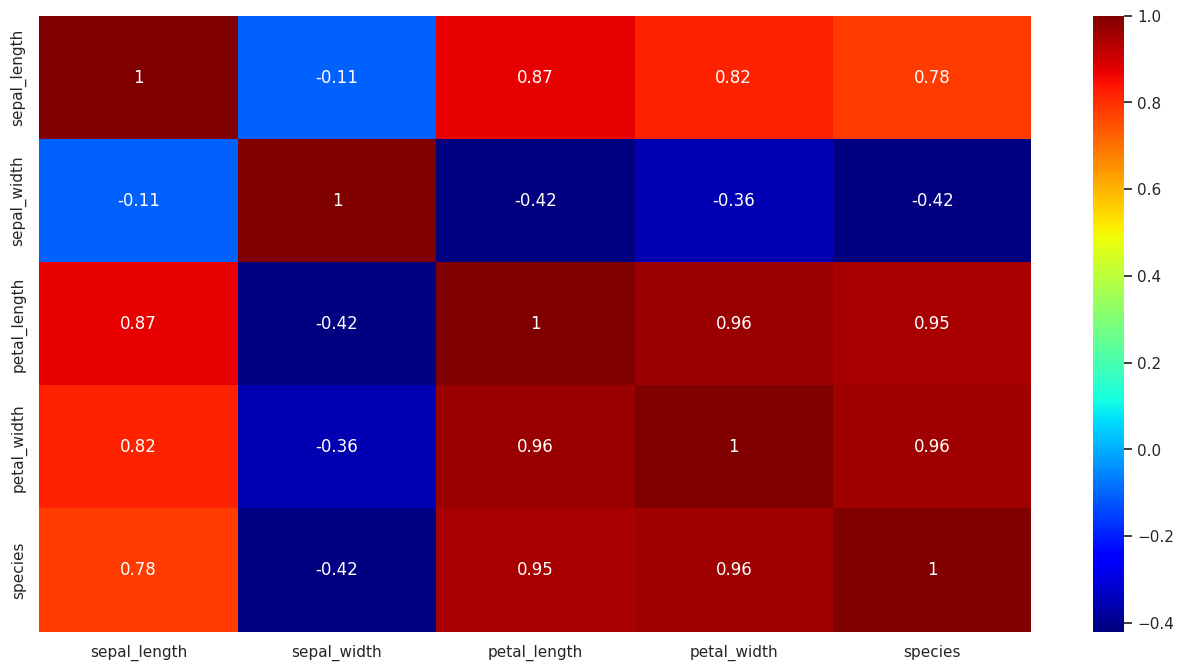

In [39]:
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'jet')

**Final results**

In [40]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

In [41]:
X = pd.DataFrame(df)
X

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [42]:
y = X.pop('species')
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [43]:
# Define the feature reduction methods
def no_reduction(X, y):
    return X

def corr_with_target(X, y, threshold=0.5):
    corr_with_target = X.corrwith(y).abs()
    features_to_keep = corr_with_target[corr_with_target >= threshold].index
    return X[features_to_keep]

def tree_based(X, y, n_features=3):
    model = RandomForestRegressor(n_estimators=100, random_state=0)
    model.fit(X, y)
    feature_importances = model.feature_importances_
    features_to_keep = X.columns[np.argsort(feature_importances)[::-1][:n_features]]
    return X[features_to_keep]

def pca_reduction(X, y, n_components=2):
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(X)
    cols = ['PC'+str(i) for i in range(1, n_components+1)]
    X_reduced_df = pd.DataFrame(X_reduced, columns=cols, index=X.index)
    return X_reduced_df

In [44]:
# Define a dictionary that maps the reduction method names to their corresponding functions
reduction_methods = {
    'No Reduction': no_reduction,
    'Corr with Target': corr_with_target,
    'Tree-based': tree_based,
    'PCA': pca_reduction
}

In [45]:
# Set the selected feature reduction method
selected_method = 'Corr with Target'

In [46]:
# Apply the selected feature reduction method
X_reduced = reduction_methods[selected_method](X, y)

In [47]:
# Print some sample output for each feature reduction method
print("Original number of features: ", X.shape[1])
print("Selected feature reduction method: ", selected_method)
print("Number of features after feature reduction: ", X_reduced.shape[1])
print("Selected features: ", X_reduced.columns)

Original number of features:  4
Selected feature reduction method:  Corr with Target
Number of features after feature reduction:  3
Selected features:  Index(['sepal_length', 'petal_length', 'petal_width'], dtype='object')



# 4) Parse the Json and make the model objects (using sklean) that can handle what is required in the “prediction_type” specified in the JSON (See 1 where “prediction_type” is specified). Keep in mind not to pick models that don’t apply for the prediction_type specified

---



In [48]:

df_json.loc['algorithms']['design_state_data']

{'RandomForestRegressor': {'model_name': 'Random Forest Regressor',
  'is_selected': True,
  'n_estimators': [10, 50, 100],
  'max_depth': [10, 20],
  'min_samples_split': 2,
  'min_samples_leaf': 1}}

**Approach 1**

In [49]:
from sklearn.metrics import mean_squared_error, r2_score

In [50]:
# Split the data into training and testing sets
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=42)

In [51]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(p_train, q_train)
rf_pred = rf.predict(p_test)
print('Random Forest Regressor: ', mean_squared_error(q_test, rf_pred))

# GBTRegressor
gbt = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbt.fit(p_train, q_train)
gbt_pred = gbt.predict(p_test)
print('GBTRegressor: ', mean_squared_error(q_test, gbt_pred))

# Linear Regression
lr = LinearRegression()
lr.fit(p_train, q_train)
lr_pred = lr.predict(p_test)
print('Linear Regression: ', mean_squared_error(q_test, lr_pred))

# Logistic Regression
#logr = LogisticRegression()
#logr.fit(p_train, q_train)
#logr_pred = logr.predict(p_test)
#print('Logistic Regression: ', r2_score(q_test, logr_pred))

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(p_train, q_train)
ridge_pred = ridge.predict(p_test)
print('Ridge Regression: ', mean_squared_error(q_test, ridge_pred))

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(p_train, q_train)
lasso_pred = lasso.predict(p_test)
print('Lasso Regression: ', mean_squared_error(q_test, lasso_pred))

# Elastic Net Regression
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(p_train, q_train)
enet_pred = enet.predict(p_test)
print('Elastic Net Regression: ', mean_squared_error(q_test, enet_pred))

# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(p_train, q_train)
dt_pred = dt.predict(p_test)
print('Decision Tree Regressor: ', mean_squared_error(q_test, dt_pred))


Random Forest Regressor:  0.04417624989965981
GBTRegressor:  0.05377212033251875
Linear Regression:  0.04643810173004898
Ridge Regression:  0.04545986663436361
Lasso Regression:  0.051572308970345065
Elastic Net Regression:  0.04899187824212669
Decision Tree Regressor:  0.08566666666666664


# 5) Run the fit and predict on each model – keep in mind that you need to do hyper parameter tuning i.e., use GridSearchCV.

---



In [52]:

from sklearn.model_selection import GridSearchCV

In [53]:
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.2, random_state=42)

In [54]:
# Define a dictionary of models with hyperparameters to try
models = {
    "Random Forest Regressor": {"model": RandomForestRegressor(),
                                "params": {"n_estimators": [50, 100, 200],
                                           "max_features": ["sqrt", "log2"]}},
    "GBT Regressor": {"model": GradientBoostingRegressor(),
                      "params": {"n_estimators": [50, 100, 200],
                                 "learning_rate": [0.01, 0.1, 1.0],
                                 "max_depth": [3, 5, 10]}},
    "Linear Regression": {"model": LinearRegression(),
                          "params": {}},
    "Ridge Regression": {"model": Ridge(),
                         "params": {"alpha": [0.01, 0.1, 1.0, 10.0]}},
    "Lasso Regression": {"model": Lasso(),
                         "params": {"alpha": [0.01, 0.1, 1.0, 10.0]}},
    "Elastic Net Regression": {"model": ElasticNet(),
                               "params": {"alpha": [0.01, 0.1, 1.0, 10.0],
                                          "l1_ratio": [0.25, 0.5, 0.75]}},
    "Decision Tree Regressor": {"model": DecisionTreeRegressor(),
                                "params": {"max_depth": [3, 5, 10]}}
}

In [55]:
# Train and evaluate each model using GridSearchCV for hyperparameter tuning
for name, mp in models.items():
    model = GridSearchCV(mp['model'], mp['params'], cv=3)
    model.fit(p_train, q_train)
    q_pred = model.predict(p_test)
    mse = mean_squared_error(q_test, q_pred)
    r2 = r2_score(q_test, q_pred)
    print(f"--->> {name}:")
    print(f"  Best Parameters: {model.best_params_}")
    print(f"  Mean Squared Error: {mse:.3f}")
    print(f"  R^2 Score: {r2:.3f}")
    print(f" prediction: {q_pred}")
    print("_________________________________________________________________________________________________________")

--->> Random Forest Regressor:
  Best Parameters: {'max_features': 'log2', 'n_estimators': 200}
  Mean Squared Error: 0.046
  R^2 Score: 0.928
 prediction: [1.4355     0.4865     1.9025     1.4375     1.705      0.2365
 1.2185     1.769      1.34       1.189      1.951      0.21283333
 0.4224     0.1175     0.32673333 1.75933333 1.90666667 1.2895
 1.426      1.806      0.2005     1.73       0.315      1.806
 2.10016667 1.9025     1.86926667 2.1335     0.21283333 0.1605    ]
_________________________________________________________________________________________________________
--->> GBT Regressor:
  Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
  Mean Squared Error: 0.048
  R^2 Score: 0.924
 prediction: [1.429886   0.37447392 1.69766667 1.429886   1.64508835 0.23094
 0.97923385 1.88937345 1.27047522 1.19487787 1.9609217  0.20063388
 0.26045992 0.19475804 0.25135102 1.53510413 1.91096422 1.25112347
 1.57725454 1.89585108 0.23942361 1.70216753 0.29832142 1.


# 6) Log to the console the standard model metrics that apply.

---



In [56]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# split the data into train and test sets
p_train, p_test, q_train, q_test = train_test_split(p, q, test_size=0.3, random_state=0)

# create regression models
linear_reg = LinearRegression()
ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()
rf_reg = RandomForestRegressor()
xgb_reg = xgb.XGBRegressor()
lgbm_reg = lgb.LGBMRegressor()

# create a list of all models
models = [LinearRegression(), Ridge(alpha=0.1), Lasso(alpha=0.1), ElasticNet(alpha=0.1),
          RandomForestRegressor(n_estimators=100, random_state=0),
          XGBRegressor(n_estimators=100, objective='reg:squarederror', random_state=0),
          LGBMRegressor(n_estimators=100, random_state=0)]

# create empty lists to store metrics for each model
rmse_list = []
mae_list = []

# loop through each model, fit the model, make predictions, and calculate metrics
for model in models:
    model.fit(p_train, q_train)
    q_pred = model.predict(p_test)
    rmse = np.sqrt(mean_squared_error(q_test, q_pred))
    mae = mean_absolute_error(q_test, q_pred)
    rmse_list.append(rmse)
    mae_list.append(mae)

# print the metrics for each model
for i, model in enumerate(models):
    print(f"Model: {model.__class__.__name__}")
    print(f"RMSE: {rmse_list[i]}")
    print(f"MAE: {mae_list[i]}")
    print("="*30)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000372 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 68
[LightGBM] [Info] Number of data points in the train set: 105, number of used features: 3
[LightGBM] [Info] Start training from score 1.226667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best